In [ ]:
import pandas as pd

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
import joblib
import os


#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [36]:
data = pd.read_csv('../data/train_test/anxiety_train.csv')

In [37]:
X = data.drop(columns='Anxiety_Group')

y = data['Anxiety_Group']

In [38]:
data.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher,Anxiety_Group
0,43,5.700000,1.800000,393,9,1,1,9,100,28,...,0,0,0,0,0,0,0,0,0,1
1,37,4.346532,0.150231,510,16,0,1,9,102,20,...,0,0,0,0,0,0,0,0,0,1
2,44,5.198335,1.427858,449,7,0,1,9,102,24,...,0,0,0,0,0,0,0,0,0,1
3,36,5.953822,5.546256,159,11,1,1,9,83,19,...,0,0,0,0,0,0,0,0,0,1
4,42,4.459040,0.554242,455,11,0,1,9,109,22,...,0,0,0,0,0,0,0,0,0,1


In [39]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

In [40]:
#multi_class="ovr" para problemas de multiclase
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\anear\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
pred = lr.predict(X_test)

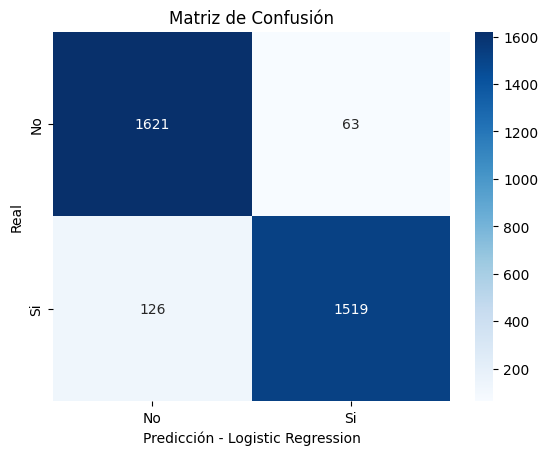

In [42]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción - Logistic Regression")
plt.ylabel("Real")
plt.show()

In [43]:
#from sklearn.metrics import accuracy_score

print("Accuracy;", accuracy_score(y_test, pred))

Accuracy; 0.9432261940522679


In [44]:
print("\nReporte de clasificación:")
print(classification_report(y_test, pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1684
           1       0.96      0.92      0.94      1645

    accuracy                           0.94      3329
   macro avg       0.94      0.94      0.94      3329
weighted avg       0.94      0.94      0.94      3329



Grid Search

In [45]:
param_grid = {'max_iter': [800, 900, 1000, 1100, 1200]}

In [46]:
grid = GridSearchCV(
    estimator=LogisticRegression(multi_class="ovr"),
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

In [47]:
grid.fit(X_train, y_train)

c:\Users\anear\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\anear\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimator,LogisticRegre...i_class='ovr')
,param_grid,"{'max_iter': [800, 900, ...]}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [48]:
pred = grid.predict(X_test)

In [49]:
print("Mejor accuracy CV:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

Mejor accuracy CV: 0.9499276120982987
Mejores parámetros: {'max_iter': 1200}


In [50]:
results = pd.DataFrame(grid.cv_results_)
results = results[[
    'param_max_iter',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'    ]]

print(results.sort_values(by='rank_test_score'))

   param_max_iter  mean_test_score  std_test_score  rank_test_score
4            1200         0.949928        0.004691                1
2            1000         0.948652        0.004294                2
3            1100         0.948579        0.005081                3
1             900         0.947901        0.004039                4
0             800         0.945198        0.005042                5


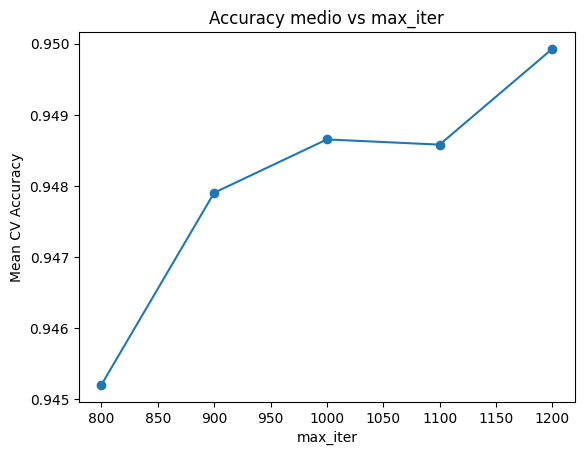

In [51]:
# Gráfico de accuracy vs max_iter
plt.plot(results['param_max_iter'], results['mean_test_score'], marker='o')
plt.title("Accuracy medio vs max_iter")
plt.xlabel("max_iter")
plt.ylabel("Mean CV Accuracy")
plt.show()

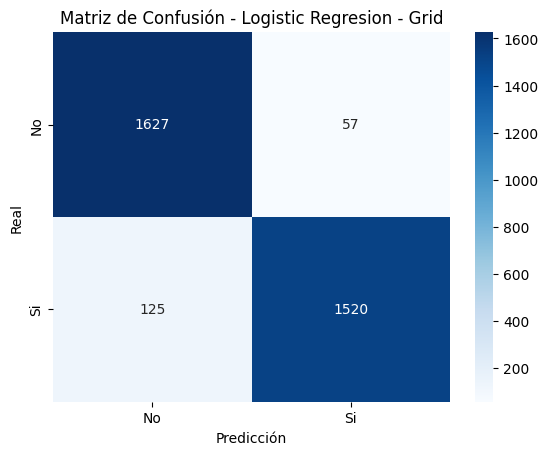

In [52]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - Logistic Regresion - Grid")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [34]:
models = '../models'
best_model = grid.best_estimator_
final_model_path = os.path.join(models, 'modelo_logistic_regression.pkl')
joblib.dump(best_model, final_model_path)
print(f"Modelo final guardado en: {final_model_path}")

Modelo final guardado en: ../models\modelo_logistic_regression.pkl
